# Homework 3

#### Submission by Eglė Pakštytė and Dija Laniauskaitė

#### Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Eglė\OneDrive - ISM University of Management and Economics\Darbalaukis\Data Mining\Homework\Homework 3\Telecom_Customer_Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory data analysis

#### Descriptive statistics

In [4]:
print("Basic Overview:")
print(df.info())


numeric_stats = df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()


print("\nDescriptive Statistics for Numeric Columns:")
print(numeric_stats)


Basic Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non

#### Overall churn rate and attributes

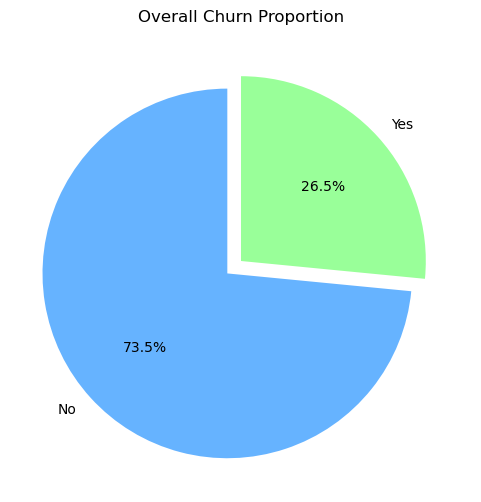

In [5]:
overall_churn_proportion = df['Churn'].value_counts(normalize=True)
plt.figure(figsize=(6, 6))
colors = ['#66b3ff', '#99ff99']
explode = (0.1, 0)
plt.pie(overall_churn_proportion, labels=overall_churn_proportion.index, autopct='%1.1f%%', colors=colors, explode=explode, startangle=90)
plt.title('Overall Churn Proportion')
plt.show()


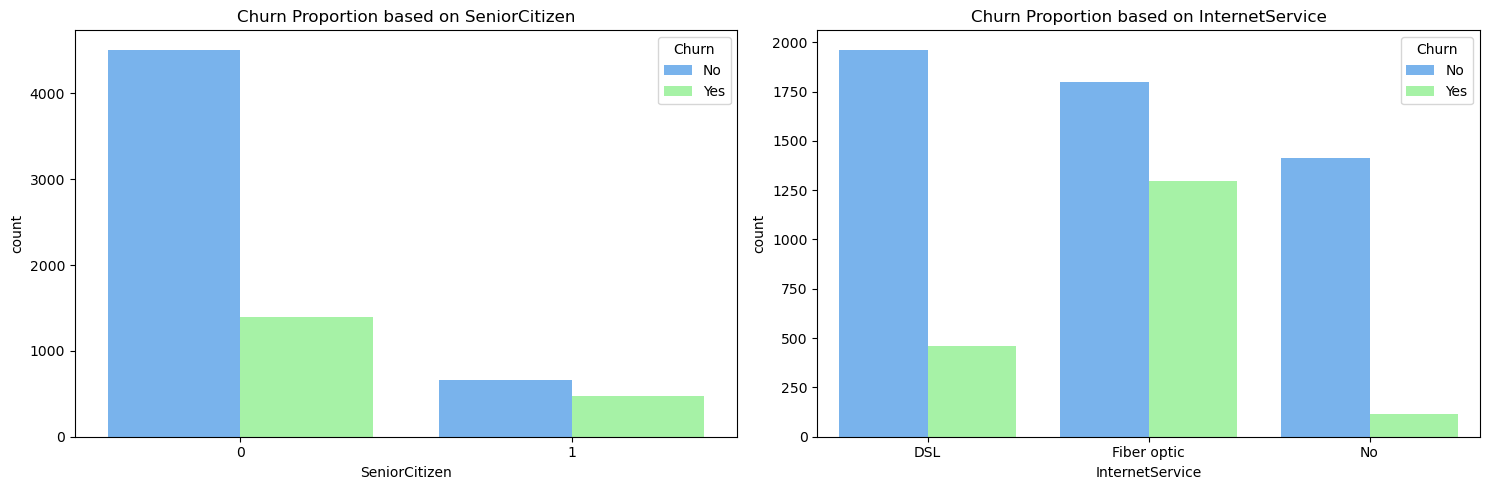

In [6]:
attributes_plot1 = ['SeniorCitizen', 'InternetService']
attributes_plot2 = ['Contract', 'TechSupport']

# Use the specified colors for the bar plots
colors = ['#66b3ff', '#99ff99']

# Set up the plotting environment for Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for i, attribute in enumerate(attributes_plot1):
    ax = sns.countplot(x=attribute, hue='Churn', data=df, ax=axes[i], palette=colors)
    ax.set_title(f'Churn Proportion based on {attribute}')

plt.tight_layout()
plt.show()

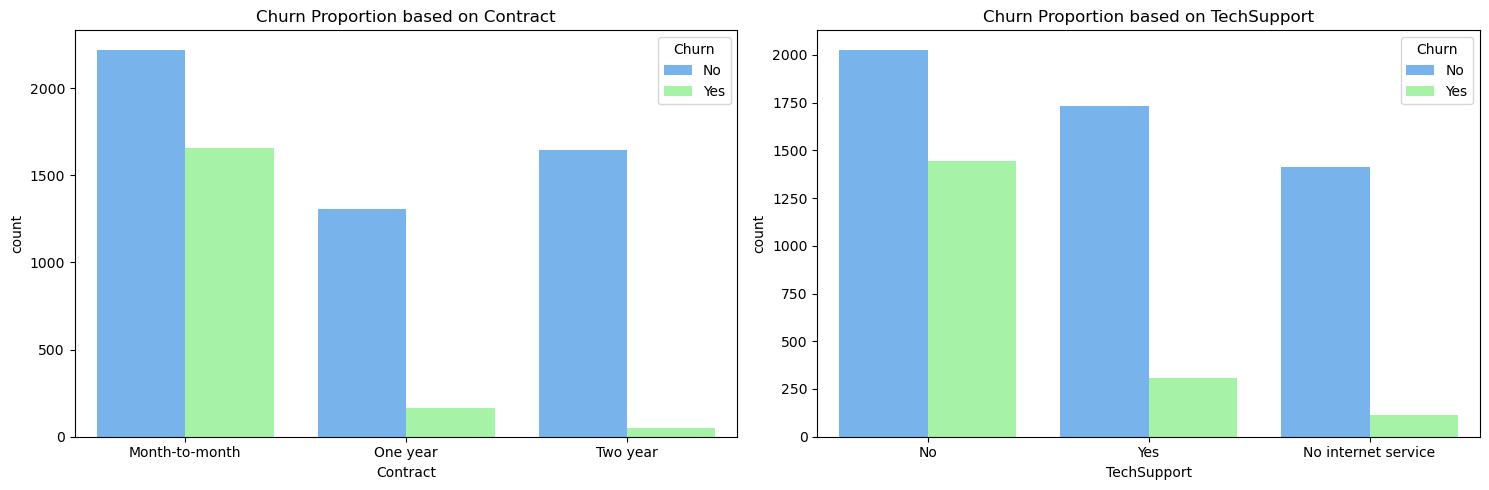

In [7]:
# Set up the plotting environment for Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for i, attribute in enumerate(attributes_plot2):
    ax = sns.countplot(x=attribute, hue='Churn', data=df, ax=axes[i], palette=colors)
    ax.set_title(f'Churn Proportion based on {attribute}')

plt.tight_layout()
plt.show()

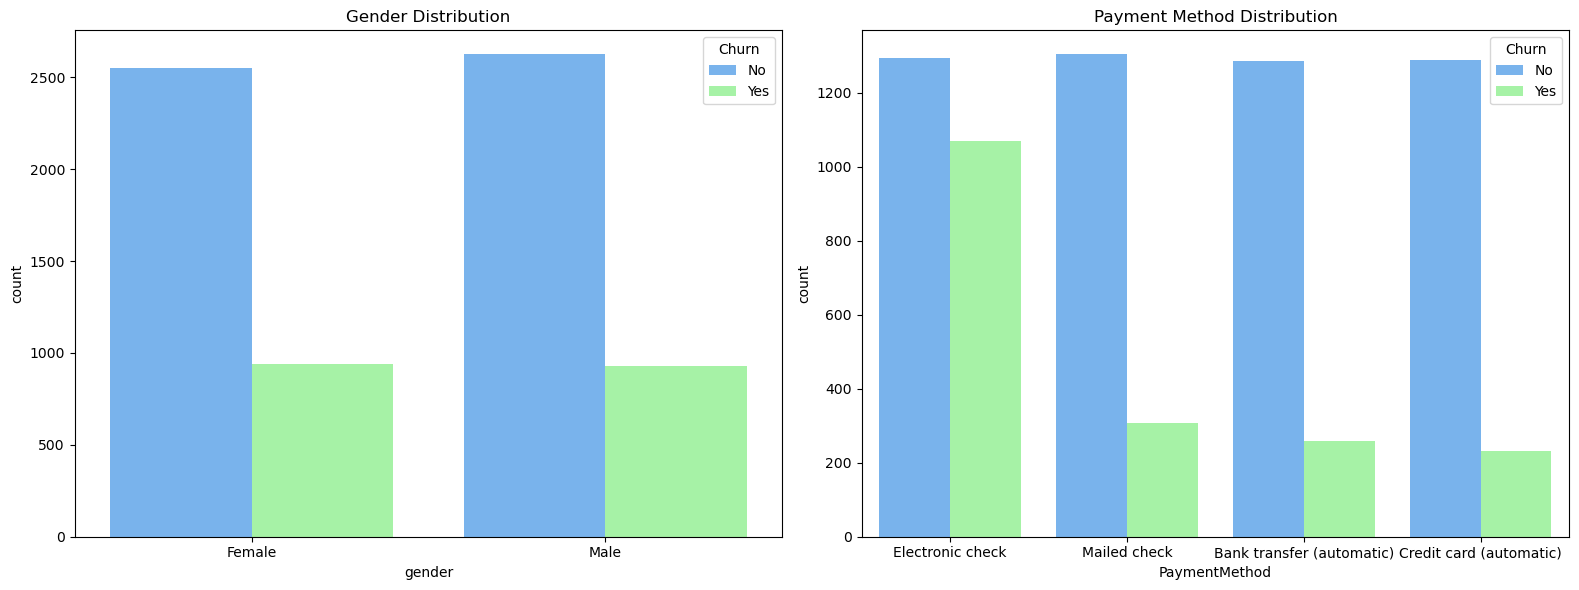

In [8]:
colors = ['#66b3ff', '#99ff99']
sns.set_palette(sns.color_palette(colors))

# Set up the plotting environment for Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot 1.1: Gender Distribution
sns.countplot(x='gender', data=df, hue='Churn', ax=axes[0])
axes[0].set_title('Gender Distribution')

# Plot 1.2: Payment Method Distribution
sns.countplot(x='PaymentMethod', data=df, hue='Churn', ax=axes[1])
axes[1].set_title('Payment Method Distribution')

plt.tight_layout()
plt.show()

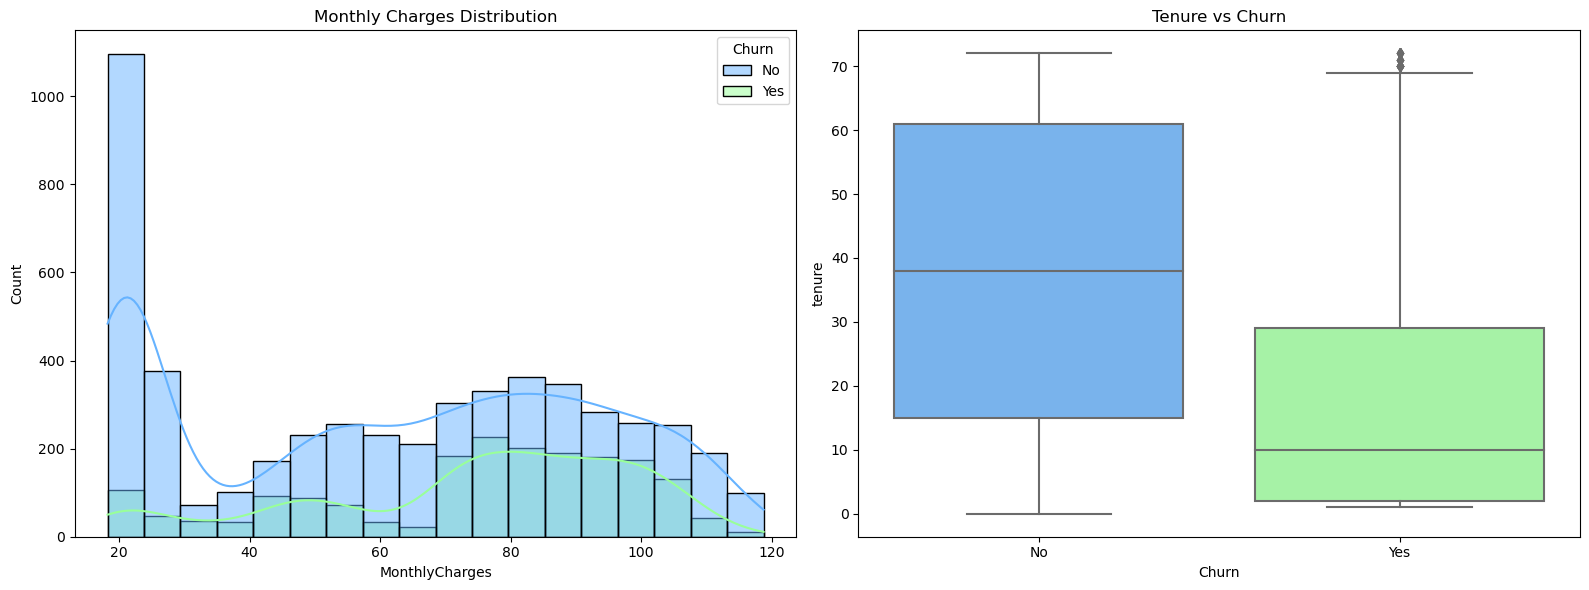

In [9]:
# Set the environment for plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot 2.1: Monthly Charges Distribution
sns.histplot(x='MonthlyCharges', data=df, kde=True, hue='Churn', ax=axes[0])
axes[0].set_title('Monthly Charges Distribution')

# Plot 2.2: Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[1])
axes[1].set_title('Tenure vs Churn')

plt.tight_layout()
plt.show()

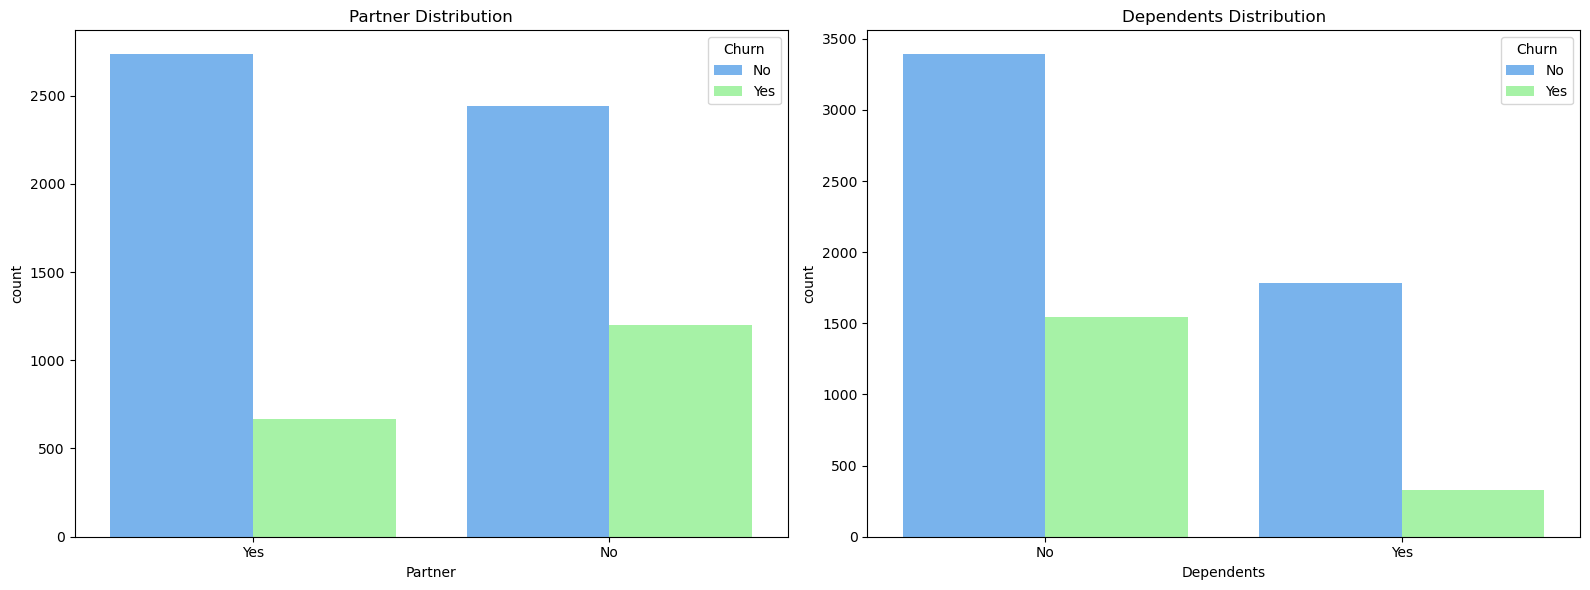

In [10]:
# Set the environment for plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot 3.1: Partner Distribution
sns.countplot(x='Partner', data=df, hue='Churn', ax=axes[0])
axes[0].set_title('Partner Distribution')

# Plot 3.2: Dependents Distribution
sns.countplot(x='Dependents', data=df, hue='Churn', ax=axes[1])
axes[1].set_title('Dependents Distribution')

plt.tight_layout()
plt.show()

# Testing the models for predicting churn

Importing everything

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


Dropping the irrelevant columns

In [12]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

Converting the continous variables into above and below average.

In [13]:
average_tenure = X['tenure'].mean()
X['tenure_avg'] = X['tenure'].apply(lambda x: 'Yes' if x > average_tenure else 'No')

In [14]:
average_monthly_charges = X['MonthlyCharges'].mean()
X['monthly_charges_avg'] = X['MonthlyCharges'].apply(lambda x: 'Yes' if x > average_monthly_charges else 'No')

In [15]:
X = X.drop(columns=['tenure', 'MonthlyCharges','TotalCharges'])

Splitting data into training and testing.

In [16]:
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



#### KNN model

In [116]:
knn_model = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 4, 7], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(knn_model, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)
print("KNN Best Parameters:", knn_grid.best_params_)
print("KNN accuracy:", knn_grid.best_score_)

KNN Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
KNN accuracy: 0.7600266981454717


In [89]:
y_pred_knn = knn_grid.predict(X_test_scaled)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

          No       0.84      0.86      0.85      1036
         Yes       0.59      0.54      0.56       373

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.71      1409
weighted avg       0.77      0.78      0.77      1409



#### Logistic Regression

In [83]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

y_pred_logistic = logistic_model.predict(X_test_scaled)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy (Logistic Regression):", accuracy_logistic)

print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logistic))

Accuracy (Logistic Regression): 0.8183108587650816
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1036
         Yes       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



#### Polynomial Logistic Regression

In [84]:
degree = 2 
poly_logreg_model = make_pipeline(PolynomialFeatures(degree), LogisticRegression())

poly_logreg_model.fit(X_train_scaled, y_train)

y_pred = poly_logreg_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

          No       0.84      0.90      0.87      1036
         Yes       0.64      0.52      0.57       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Random forest model

In [29]:
rf_model = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100, 300], 'max_depth': [None, 5, 7, 10], 'min_samples_split': [2, 5]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
print("Random Forest Best Parameters:", rf_grid.best_params_)
print("Random Forest Accuracy:", rf_grid.best_score_)

Random Forest Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 0.7923323997913322


In [117]:
y_pred_forest = rf_grid.predict(X_test_scaled)
print(classification_report(y_test,y_pred_forest))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

          No       0.84      0.91      0.88      1036
         Yes       0.68      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



#### Bagging model

In [91]:
bagging_model = BaggingClassifier(random_state=42)
bagging_params = {'n_estimators': [50, 100, 200], 'max_samples': [0.5, 1], 'max_features': [0.5, 1]}
bagging_grid = GridSearchCV(bagging_model, bagging_params, cv=5, scoring='accuracy')
bagging_grid.fit(X_train_scaled, y_train)
print("Bagging Best Parameters:", bagging_grid.best_params_)
print("Bagging Accuracy:", bagging_grid.best_score_)

Bagging Best Parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200}
Bagging Accuracy: 0.7882510823465998


In [118]:
y_pred_bagging = bagging_grid.predict(X_test_scaled)
print(classification_report(y_test,y_pred_bagging))

              precision    recall  f1-score   support

          No       0.82      0.93      0.87      1036
         Yes       0.69      0.45      0.55       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



#### Best model

In [92]:
# Compare model performances
models = {'Random Forest': rf_grid, 'KNN': knn_grid, 'Bagging': bagging_grid}
best_model_name, best_model = max(models.items(), key=lambda x: x[1].best_score_)
print(f"The best model is {best_model_name} with an accuracy of {best_model.best_score_}")

The best model is Random Forest with an accuracy of 0.7923323997913322


#### Plot Feature Importance:

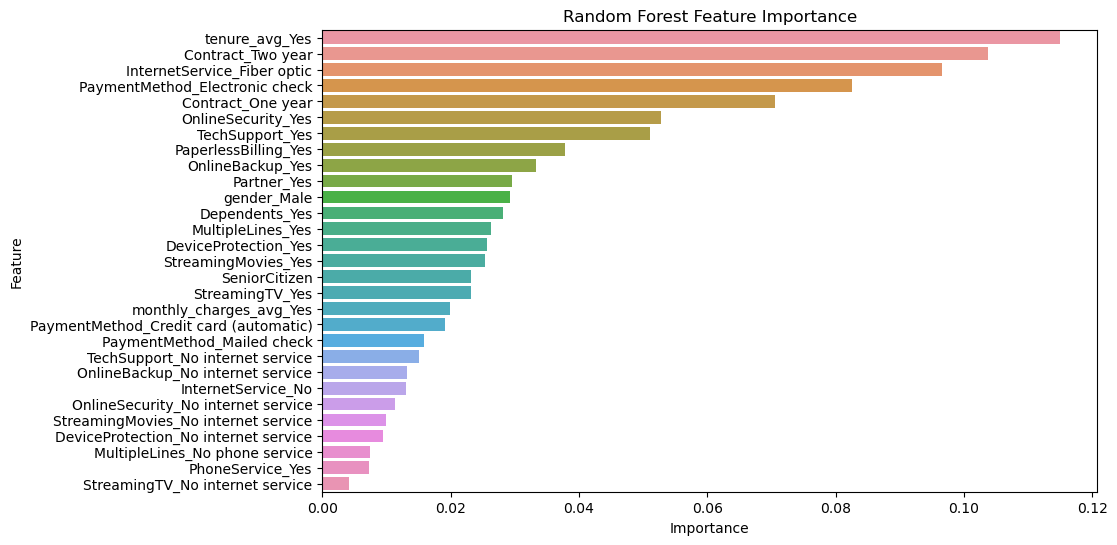

In [87]:
best_rf_model = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
best_rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Suggestions

Feature Engineering:
The first imporvement that can be made is creating new features. For instance, we could derive features related to customer tenure or calculate ratios between monthly and total charges.

Using other accuracy measures: f1 score can be more useful, unlike accuracy, the F1 score considers both precision and recall, striking a balance between the two and proving particularly useful when dealing with imbalanced datasets.

Handling Imbalanced Data: If the dataset is imbalanced (i.e., significantly more customers who didn't churn than those who did), techniques such as oversampling, undersampling can be applied to address this issue.

# Bonus:Testing models with f1

Dummifying the y

In [21]:
X = pd.get_dummies(X, drop_first=True)
y = pd.get_dummies(y, drop_first=True)
y = y['Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### KNN model

In [28]:
knn_model = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 4, 7], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(knn_model, knn_params, cv=5, scoring='f1')
knn_grid.fit(X_train_scaled, y_train)
print("KNN Best Parameters:", knn_grid.best_params_)
print("KNN best f1: ", knn_grid.best_score_)

y_pred_knn = knn_grid.predict(X_test_scaled)
print(classification_report(y_test,y_pred_knn))

KNN Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
KNN best f1:  0.5330344522051833
              precision    recall  f1-score   support

       False       0.84      0.86      0.85      1036
        True       0.59      0.54      0.56       373

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.71      1409
weighted avg       0.77      0.78      0.77      1409



#### Random Forest

In [29]:
rf_model = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100, 300], 'max_depth': [None, 5, 7, 10], 'min_samples_split': [2, 5]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='f1')
rf_grid.fit(X_train, y_train)
print("Random Forest Best Parameters:", rf_grid.best_params_)
print("Random Forest f1:", rf_grid.best_score_)

y_pred_forest = rf_grid.predict(X_test_scaled)
print(classification_report(y_test,y_pred_forest))

Random Forest Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest f1: 0.5569827283459293
              precision    recall  f1-score   support

       False       0.84      0.91      0.88      1036
        True       0.68      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### Bagging 

In [30]:
bagging_model = BaggingClassifier(random_state=42)
bagging_params = {'n_estimators': [50, 100, 200], 'max_samples': [0.5, 1], 'max_features': [0.5, 1]}
bagging_grid = GridSearchCV(bagging_model, bagging_params, cv=5, scoring='f1')
bagging_grid.fit(X_train_scaled, y_train)
print("Bagging Best Parameters:", bagging_grid.best_params_)
print("Bagging f1:", bagging_grid.best_score_)

y_pred_bagging = bagging_grid.predict(X_test_scaled)
print(classification_report(y_test,y_pred_bagging))

Bagging Best Parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200}
Bagging f1: 0.5096421480977458
              precision    recall  f1-score   support

       False       0.82      0.93      0.87      1036
        True       0.69      0.45      0.55       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409

